In [48]:
import numpy as np
import pylab as mplot
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import healpy as hp

In [49]:
theta, moment, err = np.genfromtxt("data/second_moments_mcal.txt", unpack=True)

In [50]:
theta_theo, moment_theo = np.genfromtxt("theo.csv", unpack=True)

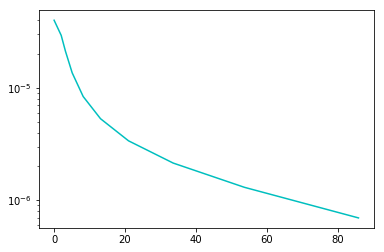

In [51]:
plt.semilogy(theta, moment, color='c')


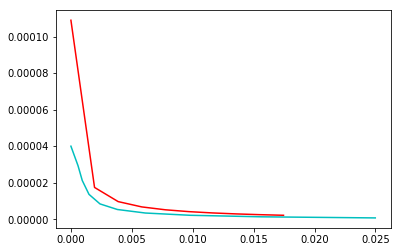

In [55]:
plt.plot(theta/60/180*np.pi, moment, color='c')
plt.plot(theta_theo, moment_theo, color='r')
#plt.yscale('log')
plt.show()

In [53]:
print(moment_theo)

[  1.08926404e-04   1.73873255e-05   9.62756411e-06   6.72127828e-06
   5.14281924e-06   4.12999124e-06   3.41679913e-06   2.88429914e-06
   2.47046085e-06   2.13936650e-06]


In [5]:
import astropy.io.fits as pf
%pylab inline
kappa = pf.open('y1a1_spt_mcal_6_kE.fits')[1].data['kE']
jkid = pf.open('y1a1_spt_mcal_6_mask_jk.fits')[1].data['jk']

Populating the interactive namespace from numpy and matplotlib


In [6]:
print(len(kappa))
print(kappa[jkid != 0])
print(len(kappa[jkid != 0]))

12582912
[ 0.00148207 -0.02574884 -0.00610199 ..., -0.03736724  0.00507194
 -0.0114657 ]
477699


In [7]:
print(np.unique(jkid))
print(len(np.unique(jkid)))

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.]
101


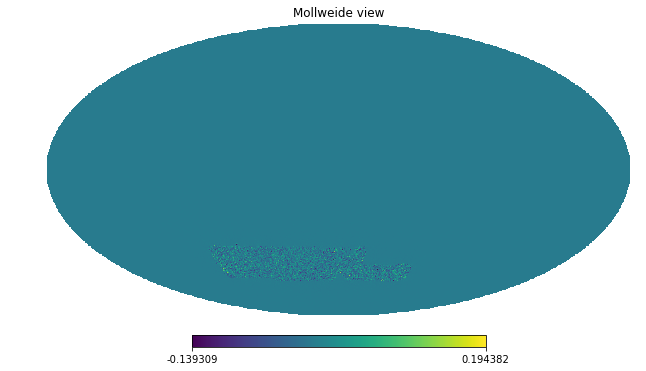

In [8]:
hp.mollview(kappa)

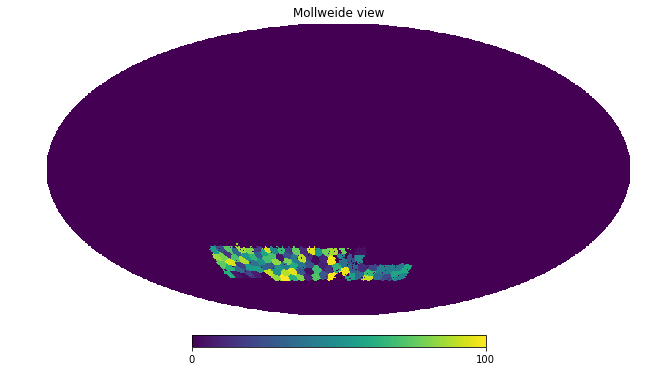

In [9]:
hp.mollview(jkid)

In [10]:
import astropy.stats as stat

In [11]:
var = np.var(kappa[jkid!=0])
print(var)

0.000901890530126


In [12]:
theta = np.linspace(0, 2*np.pi*(1./360), num=10)
print(theta)

[ 0.          0.00193925  0.00387851  0.00581776  0.00775702  0.00969627
  0.01163553  0.01357478  0.01551404  0.01745329]


In [10]:
# smooth1 = hp.sphtfunc.smoothing(kappa, sigma = theta[0])
# smooth2 = hp.sphtfunc.smoothing(kappa, sigma = theta[1])
# smooth3 = hp.sphtfunc.smoothing(kappa, sigma = theta[2])
# smooth4 = hp.sphtfunc.smoothing(kappa, sigma = theta[3])
# smooth5 = hp.sphtfunc.smoothing(kappa, sigma = theta[4])
# smooth6 = hp.sphtfunc.smoothing(kappa, sigma = theta[5])
# smooth7 = hp.sphtfunc.smoothing(kappa, sigma = theta[6])
# smooth8 = hp.sphtfunc.smoothing(kappa, sigma = theta[7])
# smooth9 = hp.sphtfunc.smoothing(kappa, sigma = theta[8])
# smooth10 = hp.sphtfunc.smoothing(kappa, sigma = theta[10])

Sigma is 1718.873385 arcmin (0.500000 rad) 
-> fwhm is 4047.637503 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [32]:
removed = []
removed_jkid = []
removed_masks = []
# removed = np.array([])
# removed_jkid = np.array([])
# removed_masks = np.array([])
for i in range(100):
    print(i)
    temp = kappa
    tempjk = jkid
    mask = (jkid == i)
    temp[mask] = 0
    tempjk[mask] = 0
#     np.append(removed, temp)
#     np.append(removed_jkid, tempjk)
    removed.append(temp)
    removed_jkid.append(tempjk)
    removed_masks.append((jkid != 0).astype(int))

theta = np.linspace(0, 2*np.pi*(1./360), num=10)

print(removed[0])
print(removed_masks[0])

smooth1 = hp.sphtfunc.smoothing(removed[0], sigma = theta[1])
mask_smooth1 = hp.sphtfunc.smoothing(removed_masks[0], sigma = theta[1])

print(smooth1)
print(mask_smooth1)

final_smooth1 = smooth1/mask_smooth1
print(final_smooth1)
moment1 = np.var(final_smooth1[np.isfinite(final_smooth1)])
print(moment1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[ 0.  0.  0. ...,  0.  0.  0.]
[0 0 0 ..., 0 0 0]
Sigma is 6.666667 arcmin (0.001939 rad) 
-> fwhm is 15.698800 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 6.666667 arcmin (0.001939 rad) 
-> fwhm is 15.698800 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
[ -3.60775825e-10  -4.71500989e-09  -7.87509778e-09 ...,   2.37062559e-08
   3.07299019e-08   2.13261046e-08]
[ -5.25103172e-07  -2.82616620e-07  -1.09523450e-07 ...,  -1.24422959e-06
  -7.18045336e-07  -1.43762306e-06]
[ 0.00068706  0.01668341  0.0719033  ..., -0.01905296 -0.0427966
 -0.01483428]
28822.8058223


In [29]:
print(len(removed_masks[0][removed_masks > 0]))

TypeError: '>' not supported between instances of 'list' and 'int'

In [29]:
removed = []
removed_masks = []
for i in range(100):
    print(i)
    mask = (jkid != i)
    removed.append([kappa[mask]])
    removed_masks.append((jkid != 0).astype(int))


KeyboardInterrupt: 

In [36]:
print(final_smooth1[:100])

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.]


In [ ]:
removed = []
mask = (jkid != 0)
for i in range(100):
    removed.append([])
for i in range(len(kappa[mask])):
    print(i)
    for j in range(100):
        if jkid[mask][i] != j:
            removed[j].append(kappa[mask][i])

In [ ]:
print(len(kappa[jkid!=0]))
print(len(kappa))

In [ ]:
stat.jackknife_stats(kappa[jkid!=0], np.cov)

In [ ]:
# from astropy.stats import jackknife_resampling
# resamples = jackknife_resampling(kappa[:100000])